# Sprawozdanie z Laboratorium 8
## Autorzy: Mateusz Pawliczek, Piotr Åšwierzy  
## Data: 13.05.2025

# Zadanie 1

## Cel zadania

Dla poniÅ¼szych funkcji i punktÃ³w poczÄ…tkowych metoda Newtona
 zawodzi. WyjaÅ›nij dlaczego. NastÄ™pnie znajdÅº pierwiastki, modyfikujÄ…c wywo
Å‚anie funkcji scipy.optimize.newton lub uÅ¼ywajÄ…c innej metody.


## Podpunkt A 

#### Dlaczego Newton zawodzi:
Funkcja Newtona utyka w punkcie $x = 1$. Funkcja wykonmuje obliczenia i caÅ‚y czas przechodzi miÄ™dzy wartoÅ›ciÄ… $x = 1$, a $x = -1$ i tak w kÃ³Å‚ko.

#### RozwiÄ…zanie:

Zmieniono punkt poczÄ…tkowy na bliÅ¼szy jednemu z pierwiastkÃ³w: $x_0 = 2.5$


In [1]:
from scipy.optimize import newton

f = lambda x: x**3 - 5*x
df = lambda x: 3*x**2 - 5

root = newton(f, x0=2.5, fprime=df)
print("Znaleziony pierwiastek:", root)


Znaleziony pierwiastek: 2.23606797749979


## Podpunkt B

#### Dlaczego Newton zawodzi:

WartoÅ›Ä‡ $f'(x)$ dla $x = 1$ wynosi $0$. Metoda Newtona zawodzi ze wzglÄ™u na dzielenie przez zero, wiÄ™c trzeba uÅ¼yÄ‡ innej metody.

#### RozwiÄ…zanie

UÅ¼yto metody Brent`a (Bisekcja)

In [2]:
from scipy.optimize import brentq
f = lambda x: x**3 - 3*x + 1

root = brentq(f, -2, 0)  # Pierwiastek leÅ¼y w tym przedziale
print("Znaleziony pierwiastek:", root)

Znaleziony pierwiastek: -1.8793852415718169


## Podpunkt C

#### Dlaczego Newton zawodzi:

Sytuacja bliÅºniacza do podpunktu B, jednak tutaj wartoÅ›Ä‡ w $x_0$ jest bardzo bliska zeru co moÅ¼e byÄ‡ problemem dla metody Newtona.

#### RozwiÄ…zanie

Zmiana punktu startowego $x_0$ na $1.2$

In [3]:
f = lambda x: 2 - x**5
df = lambda x: -5*x**4

root = newton(f, x0=1.2, fprime=df)
print("Znaleziony pierwiastek:", root)

Znaleziony pierwiastek: 1.148698354997035


## Podpunkt D

#### Dlaczego Newton zawodzi:

Pochodna w $x_0 = 0.8$ nie zeruje siÄ™, ale za to sama funkcja ma bardzo skomplikowany wzÃ³r co sprawia, Å¼e metoda Newtona moÅ¼e utknÄ…Ä‡ przy minimum lokalnym.

#### RozwiÄ…zanie

UÅ¼yto metody Brent`a (Bisekcji)

In [4]:
f = lambda x: x**4 - 4.29*x**2 - 5.29

root = brentq(f, -3, -1)
print("Znaleziony pierwiastek:", root)

Znaleziony pierwiastek: -2.3000000000000003


## Podsumowanie - Zadanie 1

Metoda Newtona ma swoje ograniczenia zwiÄ…zane z potencjalnym utkniÄ™ciem na wartoÅ›ciach ktÃ³re zbliÅ¼ajÄ… siÄ™ do zera lub w przypadku skomplikowanych funkcjim, gdzie pÅ‚apka dla tej metody mogÄ… siÄ™ ukazaÄ‡ ekstrema lokalne.

Pomocna okazuje siÄ™ alternatywna metoda bisekcji, ktÃ³ra jest duÅ¼o prostszym algorytmem, jednak wymaga okreÅ›lenia przedziaÅ‚u na ktÃ³rym znajduje siÄ™ szukany pierwiastek.

# Zadanie 2 - Schematy iteracyjne i analiza zbieÅ¼noÅ›ci

#### Dane:

RozwiÄ…zujemy rÃ³wnanie:

```math
f(x) = x^2 - 3x + 2 = 0
```

RozwiÄ…zania analityczne:

```math
f(x) = (x - 1)(x - 2) \Rightarrow x = 1 \quad \text{lub} \quad x = 2
```

Skupiamy siÄ™ na pierwiastku:

```math
\alpha = 2
```

---

## **2(a) Analiza teoretyczna zbieÅ¼noÅ›ci**

Dla metody iteracyjnej $x_{k+1} = \varphi(x_k)$, rozpatrujemy cztery funkcje iteracyjne:

```math
\begin{aligned}
\varphi_1(x) &= \frac{x^2 + 2}{3} \\
\varphi_2(x) &= \sqrt{3x - 2} \\
\varphi_3(x) &= 3 - \frac{2}{x} \\
\varphi_4(x) &= \frac{x^2 - 2}{2x - 3}
\end{aligned}
```

Zasady zbieÅ¼noÅ›ci:

* JeÅ›li $|\varphi'(x^*)| < 1$ â€” lokalna zbieÅ¼noÅ›Ä‡
* JeÅ›li $|\varphi'(x^*)| = 0$ â€” zbieÅ¼noÅ›Ä‡ kwadratowa
* JeÅ›li $|\varphi'(x^*)| > 1$ â€” rozbieÅ¼noÅ›Ä‡

### Pochodne i wartoÅ›ci w $x = 2$:

```math
\begin{aligned}
\varphi_1'(x) &= \frac{2x}{3}, && \varphi_1'(2) = \frac{4}{3} > 1 \quad \text{(rozbieÅ¼na)} \\
\varphi_2'(x) &= \frac{3}{2\sqrt{3x - 2}}, && \varphi_2'(2) = \frac{3}{4} \quad \text{(zbieÅ¼na)} \\
\varphi_3'(x) &= \frac{2}{x^2}, && \varphi_3'(2) = \frac{1}{2} \quad \text{(zbieÅ¼na)} \\
\varphi_4'(x) &= \text{(zÅ‚oÅ¼ona)} \Rightarrow \varphi_4'(2) = 0 \quad \text{(zbieÅ¼noÅ›Ä‡ kwadratowa)}
\end{aligned}
```



## **Zadanie 2(b): Implementacja iteracyjna i analiza zbieÅ¼noÅ›ci**

W tej czÄ™Å›ci testujemy w praktyce cztery schematy iteracyjne odpowiadajÄ…ce funkcjom:

```math
\begin{aligned}
\varphi_1(x) &= \frac{x^2 + 2}{3} \\
\varphi_2(x) &= \sqrt{3x - 2} \\
\varphi_3(x) &= 3 - \frac{2}{x} \\
\varphi_4(x) &= \frac{x^2 - 2}{2x - 3}
\end{aligned}
```

---

### Import wymaganych bibliotek

Biblioteki potrzebne do implementacji rozwiÄ…zania w Python

In [5]:
import numpy as np
import matplotlib.pyplot as plt

### Definicja funkcji iteracyjnych

In [6]:
phi1 = lambda x: (x**2 + 2)/3
phi2 = lambda x: np.sqrt(3*x - 2)
phi3 = lambda x: 3 - 2/x
phi4 = lambda x: (x**2 - 2)/(2*x - 3)

### Wykonanie 10 iteracji i obliczenie bÅ‚Ä™dÃ³w

In [7]:
phi_functions = [phi1, phi2, phi3, phi4]
labels = ['phi1', 'phi2', 'phi3', 'phi4']
x_exact = 2
x0 = 1.51 # zaczynamy od 1.51 a nie 1.5 aby w phi4 nie byÅ‚o dzielenia przez 0
results = []

for phi in phi_functions:
    xk = x0
    x_vals = [xk]
    for _ in range(10):
        try:
            xk = phi(xk)
        except:
            xk = np.nan
        x_vals.append(xk)
    errors = [abs(x - x_exact) if not np.isnan(x) else np.nan for x in x_vals]
    results.append((x_vals, errors))


### Obliczanie rzÄ™du zbieÅ¼noÅ›ci

RzÄ…d zbieÅ¼noÅ›ci obliczamy ze wzoru:

```math
r_k = \frac{\ln(\varepsilon_{k+1}/\varepsilon_k)}{\ln(\varepsilon_k/\varepsilon_{k-1})}
```

In [8]:
for i in range(len(results)):
    _, errors = results[i]
    r_vals = []
    for k in range(1, len(errors) - 1):
        if errors[k-1] > 0 and errors[k] > 0 and errors[k+1] > 0:
            r = np.log(errors[k+1]/errors[k]) / np.log(errors[k]/errors[k-1])
            r_vals.append(r)
        else:
            r_vals.append(np.nan)
    results[i] += (r_vals,)

## **Zadanie 2(c): Wykresy bÅ‚Ä™dÃ³w iteracyjnych**

### Wykres 1 â€“ Wszystkie metody

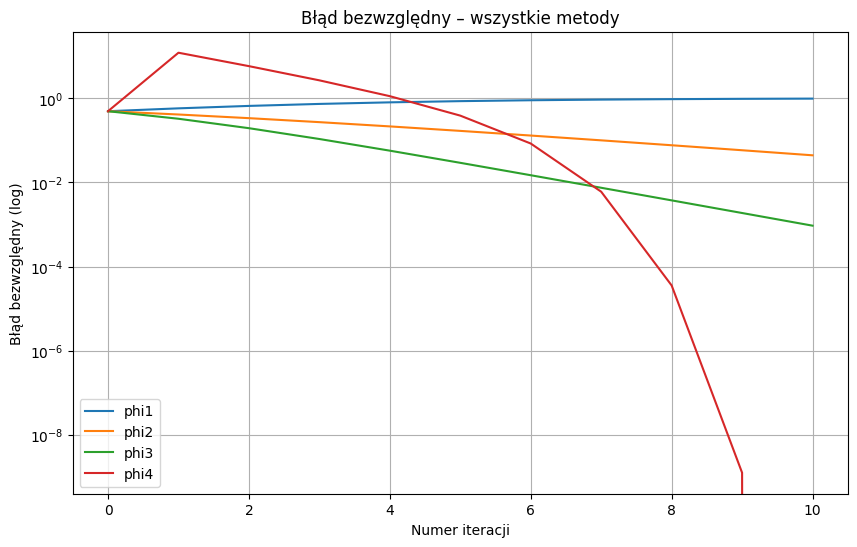

In [9]:
plt.figure(figsize=(10,6))
for i, (x_vals, errors, _) in enumerate(results):
    plt.semilogy(range(len(errors)), errors, label=labels[i])
plt.xlabel("Numer iteracji")
plt.ylabel("BÅ‚Ä…d bezwzglÄ™dny (log)")
plt.title("BÅ‚Ä…d bezwzglÄ™dny â€“ wszystkie metody")
plt.grid(True)
plt.legend()
plt.show()

### Wykres 2 â€“ Tylko metody zbieÅ¼ne

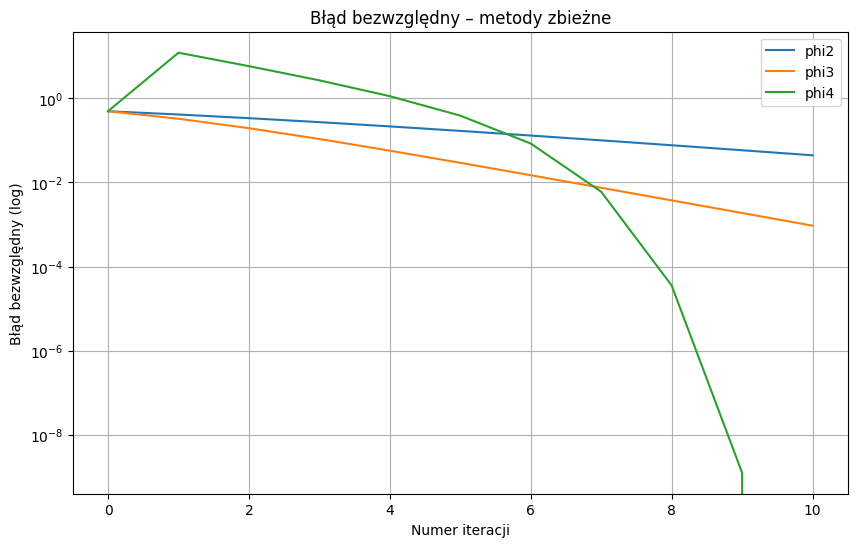

In [10]:
plt.figure(figsize=(10,6))
for i, (x_vals, errors, _) in enumerate(results):
    if labels[i] != 'phi1':  # pomijamy rozbieÅ¼nÄ… metodÄ™
        plt.semilogy(range(len(errors)), errors, label=labels[i])
plt.xlabel("Numer iteracji")
plt.ylabel("BÅ‚Ä…d bezwzglÄ™dny (log)")
plt.title("BÅ‚Ä…d bezwzglÄ™dny â€“ metody zbieÅ¼ne")
plt.grid(True)
plt.legend()
plt.show()

## ðŸ§  Wnioski

* $\varphi_1(x)$ â€” **rozbieÅ¼na**, nie powinna byÄ‡ stosowana.
* $\varphi_2(x)$, $\varphi_3(x)$ â€” **zbieÅ¼noÅ›Ä‡ liniowa**, stabilna, ale wolna.
* $\varphi_4(x)$ â€” **zbieÅ¼noÅ›Ä‡ kwadratowa**, najlepszy wynik numerycznie i teoretycznie.
* Eksperymentalne rzÄ™dy zbieÅ¼noÅ›ci potwierdzajÄ… obliczenia z punktu (a).


# Zadanie 3

**Schemat iteracji** to wzÃ³r, wedÅ‚ug ktÃ³rego obliczamy kolejne przybliÅ¼enia rozwiÄ…zania rÃ³wnania podczas stosowania metody numerycznej â€” w tym przypadku metody Newtona.

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

3(a) \
\
$f(x) = x^3-2x-5 = 0$\
$f'(x) = 3x^2-2$\
*Schemat iteracji:*
$$
x_{n+1}=x_n - \frac{x_n^3-2x_n-5}{3x_n^2-2}
$$

3(b) \
\
$f(x) = e^{-x}-x = 0$\
$f'(x) = -e^{-x}-1$\
*Schemat iteracji:*
$$
x_{n+1}=x_n - \frac{e^{-x_n}-x_n}{-e^{-x_n}-1}
$$

3(c) \
\
$f(x) = x\sin(x)-1 = 0$\
$f'(x) = \sin(x)+x\cos(x)$\
*Schemat iteracji:*
$$
x_{n+1}=x_n - \frac{x_n\sin(x_n)-1}{\sin(x_n)+x_n\cos(x_n)}
$$

### Druga czÄ™Å›Ä‡ zadania

ZakÅ‚adamy, Å¼e:
- Startowe przybliÅ¼enie $x_0$ ma dokÅ‚adnoÅ›Ä‡ 4-bitowÄ… (czyli $\epsilon_0 \approx 2^{-4} = 0.0625$)
- Metoda Newtona zbiega **kwadratowa**, wiÄ™c:
$$
\epsilon_{n+1} \approx (\epsilon_n)^2
$$

Z tego wynika, Å¼e:
$$
\epsilon_1 = 2^{-8} \newline
\epsilon_2 = 2^{-16} \newline
\epsilon_3 = 2^{-32} \newline
\epsilon_4 = 2^{-64}
$$

Aby osiÄ…gnÄ…Ä‡:
- 24-bitowÄ… dokÅ‚adnoÅ›Ä‡ potrzebujemy $\epsilon_3<2^{-24}$, czyli 3 iteracje.
- 53-bitowÄ… dokÅ‚adnoÅ›Ä‡ potrzebujemy $\epsilon_4<2^{-53}$, czyli 4 iteracje.

# Zadanie 4

RozwaÅ¼amy ukÅ‚ad rÃ³wnaÅ„:

$$
\begin{cases}
f_1(x_1, x_2) = x_1^2 + x_2^2 - 1 = 0 \\
f_2(x_1, x_2) = x_1^2 - x_2 = 0
\end{cases}
$$

Zdefiniujemy funkcje wektorowÄ…:
$$
\vec{f}(\vec{x}) = 
\begin{bmatrix}
f_1(x_1, x_2) \\
f_2(x_1, x_2)
\end{bmatrix}
=
\begin{bmatrix}
x_1^2 + x_2^2 - 1 \\
x_1^2 - x_2
\end{bmatrix}
$$

Iteracja Newtona wyglÄ…da tak:
$$
\vec{x}^{(n+1)} = \vec{x}^{(n)} - J_f^{-1}(\vec{x}^{(n)}) \cdot \vec{f}(\vec{x}^{(n)})
$$

Jacobian tej funkcji (macierz pochodnych czÄ…stkowych) ma postaÄ‡:
$$
J_f(x_1, x_2) = 
\begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} \\
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2}
\end{bmatrix}
=
\begin{bmatrix}
2x_1 & 2x_2 \\
2x_1 & -1
\end{bmatrix}
$$



In [11]:
import numpy as np

def f_vec(v):
    x1, x2 = v
    f1 = x1**2 + x2**2 - 1
    f2 = x1**2 - x2
    return np.array([f1, f2])

def x_n_plus_1(vn):
    x1, x2 = vn

    jakobian = np.array([[2*x1, 2*x2], [2*x1, -1]])

    res = np.linalg.solve(jakobian, -f_vec(vn))

    return res + vn

def x_newtona(x0):
    x1 = x_n_plus_1(x0)
    while(np.linalg.norm(x1-x0) > 0.0001):
        x0, x1 = x1, x_n_plus_1(x1)
    return x1

x0 = [0.5, 0.2]

approx = x_newtona(x0)
print("Obliczone x^Newtona: ", approx)

true_x1 = np.sqrt(np.sqrt(5)/2 - 0.5)
true_x2 = np.sqrt(5)/2 - 0.5

relative_error = np.linalg.norm(approx - [true_x1, true_x2]) /\
                 np.linalg.norm([true_x1, true_x2])

print("BÅ‚Ä…d wzglÄ™dny: ",relative_error)

Obliczone x^Newtona:  [0.78615138 0.61803399]
BÅ‚Ä…d wzglÄ™dny:  5.773159728050814e-15
